In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#DATA SET
df2012_13 = pd.read_csv('bank.csv')
dataset=df2012_13
print("Current shape of dataset :",dataset.shape)
dataset.head()

Current shape of dataset : (55705, 53)


,loan_id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_month,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,9614775,11466913,6500,6500,6500.0,36,13.53,220.68,B,B5,Acute Dialysis RN,< 1 year,MORTGAGE,72000.00,Source Verified,Dec-13,5,n,NaN,credit_card,Credit card refinancing,933xx,CA,13.68,0,3,36.0,NaN,11,0,5007,65.9,20,f,5514.96000,5514.96,4227.90,1287.06,0.0,0.0,0.0,Jan-16,220.68,Feb-16,Jan-16,0,40.0,INDIVIDUAL,NaN,0,111,202685,7600
1,9604806,11456941,15000,15000,15000.0,36,16.99,534.72,D,D1,utility engineer,7 years,MORTGAGE,62000.00,Verified,Dec-13,6,n,NaN,other,personal,913xx,CA,10.65,0,4,77.0,NaN,16,0,8163,20.3,32,w,16204.49000,16204.49,15000.00,1204.49,0.0,0.0,0.0,Jun-14,13530.89,NaN,Jul-14,0,77.0,INDIVIDUAL,NaN,0,4095,332694,40300
2,9634771,11486909,12000,12000,12000.0,60,14.98,285.36,C,C3,Exec Assistant,3 years,RENT,72481.00,Source Verified,Dec-13,5,n,Borrower added on 12/06/13 > using the loan ...,credit_card,Credit card refinancing,980xx,WA,22.17,0,1,NaN,NaN,12,0,49536,90.7,21,f,7133.82000,7133.82,3948.69,3185.13,0.0,0.0,0.0,Jan-16,285.36,Feb-16,Jan-16,0,NaN,INDIVIDUAL,NaN,0,0,273778,54600
3,9604753,11456896,8000,8000,8000.0,36,14.98,277.25,C,C3,Project Manager,8 years,RENT,62000.00,Verified,Dec-13,5,n,NaN,debt_consolidation,DC Debt,333xx,FL,13.98,0,0,51.0,NaN,4,0,2581,99.3,10,f,6937.32000,6937.32,5166.86,1770.46,0.0,0.0,0.0,Jan-16,283.64,Feb-16,Jan-16,1,NaN,INDIVIDUAL,NaN,0,51,24661,2600
4,9634776,11486914,12000,12000,12000.0,36,15.61,419.58,C,C4,csr,5 years,MORTGAGE,58997.49,Not Verified,Dec-13,6,n,NaN,debt_consolidation,Debt consolidaton,811xx,CO,12.04,0,0,27.0,NaN,13,0,10257,75.4,37,f,13911.78771,13911.79,12000.00,1911.79,0.0,0.0,0.0,Feb-15,8457.99,NaN,Jan-16,0,27.0,INDIVIDUAL,NaN,0,0,174817,13600


In [3]:
#DATA CLEANING
del_col_names = ["emp_title","pymnt_plan","title","zip_code","addr_state","delinq_2yrs",
                 "inq_last_6mths","pub_rec","total_acc","initial_list_status","total_rec_late_fee",
                 "recoveries","collection_recovery_fee","collections_12_mths_ex_med","application_type","acc_now_delinq"]
dataset = dataset.drop(labels = del_col_names, axis = 1)
dataset=dataset.dropna(axis=1)
print("Current shape of dataset :",dataset.shape)
dataset.head()

Current shape of dataset : (55705, 27)


,loan_id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_month,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,9614775,11466913,6500,6500,6500.0,36,13.53,220.68,B,B5,MORTGAGE,72000.00,Source Verified,Dec-13,5,credit_card,13.68,11,5007,5514.96000,5514.96,4227.90,1287.06,220.68,111,202685,7600
1,9604806,11456941,15000,15000,15000.0,36,16.99,534.72,D,D1,MORTGAGE,62000.00,Verified,Dec-13,6,other,10.65,16,8163,16204.49000,16204.49,15000.00,1204.49,13530.89,4095,332694,40300
2,9634771,11486909,12000,12000,12000.0,60,14.98,285.36,C,C3,RENT,72481.00,Source Verified,Dec-13,5,credit_card,22.17,12,49536,7133.82000,7133.82,3948.69,3185.13,285.36,0,273778,54600
3,9604753,11456896,8000,8000,8000.0,36,14.98,277.25,C,C3,RENT,62000.00,Verified,Dec-13,5,debt_consolidation,13.98,4,2581,6937.32000,6937.32,5166.86,1770.46,283.64,51,24661,2600
4,9634776,11486914,12000,12000,12000.0,36,15.61,419.58,C,C4,MORTGAGE,58997.49,Not Verified,Dec-13,6,debt_consolidation,12.04,13,10257,13911.78771,13911.79,12000.00,1911.79,8457.99,0,174817,13600


In [4]:
#FEATURE ADDITION
full_df=dataset
full_df['Monthly_income']=(full_df['annual_inc']/12).round(2)
full_df['Interest'] = (full_df['funded_amnt']*full_df['int_rate']*full_df['term_month']/(100*12)).round(2)
full_df['unpaid_perc'] = ((full_df['Interest'] - full_df['total_rec_int'])/full_df['Interest']).round(2)
full_df['iti'] = (full_df['Interest']/full_df['Monthly_income']*12).round(2)
full_df['paid_perc']=(full_df["total_rec_int"]/full_df["funded_amnt"]).round(2)
full_df['rec_isto_fund']=(full_df["total_rec_int"]/full_df["funded_amnt"]*full_df['int_rate']).round(2)
full_df['rec_isto_fundterm']=(full_df['rec_isto_fund']/full_df['term_month']).round(2)
full_df["emi"]=((full_df["funded_amnt"]+full_df["Interest"])/full_df["term_month"]).round(2)
print("Current shape of dataset :",full_df.shape)
full_df.head()

Current shape of dataset : (55705, 35)


,loan_id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_month,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Monthly_income,Interest,unpaid_perc,iti,paid_perc,rec_isto_fund,rec_isto_fundterm,emi
0,9614775,11466913,6500,6500,6500.0,36,13.53,220.68,B,B5,MORTGAGE,72000.00,Source Verified,Dec-13,5,credit_card,13.68,11,5007,5514.96000,5514.96,4227.90,1287.06,220.68,111,202685,7600,6000.00,2638.35,0.51,5.28,0.20,2.68,0.07,253.84
1,9604806,11456941,15000,15000,15000.0,36,16.99,534.72,D,D1,MORTGAGE,62000.00,Verified,Dec-13,6,other,10.65,16,8163,16204.49000,16204.49,15000.00,1204.49,13530.89,4095,332694,40300,5166.67,7645.50,0.84,17.76,0.08,1.36,0.04,629.04
2,9634771,11486909,12000,12000,12000.0,60,14.98,285.36,C,C3,RENT,72481.00,Source Verified,Dec-13,5,credit_card,22.17,12,49536,7133.82000,7133.82,3948.69,3185.13,285.36,0,273778,54600,6040.08,8988.00,0.65,17.86,0.27,3.98,0.07,349.80
3,9604753,11456896,8000,8000,8000.0,36,14.98,277.25,C,C3,RENT,62000.00,Verified,Dec-13,5,debt_consolidation,13.98,4,2581,6937.32000,6937.32,5166.86,1770.46,283.64,51,24661,2600,5166.67,3595.20,0.51,8.35,0.22,3.32,0.09,322.09
4,9634776,11486914,12000,12000,12000.0,36,15.61,419.58,C,C4,MORTGAGE,58997.49,Not Verified,Dec-13,6,debt_consolidation,12.04,13,10257,13911.78771,13911.79,12000.00,1911.79,8457.99,0,174817,13600,4916.46,5619.60,0.66,13.72,0.16,2.49,0.07,489.43


In [5]:
#FEATURE TRANSFORMATION
Final_data=full_df
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data['sub_grade']=Final_data['sub_grade'].map({'A1':35,'B1':30,'C1':25,'D1':20,'E1':15,'F1':10,'G1':5,'A2':34,'B2':29,'C2':24,
                                                     'D2':19,'E2':14,'F2':9,'G2':4,'A3':33,'B3':28,'C3':23,'D3':18,'E3':13,'F3':8,
                                                     'G3':3,'A4':32,'B4':27,'C4':22,'D4':17,'E4':12,'F4':7,'G4':2,'A5':31,'B5':26,'C5':21,
                                                     'D5':16,'E5':11,'F5':6,'G5':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":5,"RENT":4,"OWN":6,"OTHER":3,"NONE":2,"ANY":1})
#Fully Paid":6,"Current":5,"Late-1":4,"Late-2":3,"Grace period":2,"default":1,"charged off":0
Final_data['verification_status']=Final_data['verification_status'].map({'Source Verified':2,'Not Verified':1,'Verified':3})
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x))
Final_data.head()

,loan_id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_month,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,revol_bal,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Monthly_income,Interest,unpaid_perc,iti,paid_perc,rec_isto_fund,rec_isto_fundterm,emi
0,9614775,11466913,6500,6500,6500.0,36,13.53,220.68,6,26,5,72000.00,2,Dec-13,5,credit_card,13.68,11,5007,5514.96000,5514.96,4227.90,1287.06,220.68,111,202685,7600,6000.00,2638.35,0.51,5.28,0.20,2.68,0.07,253.84
1,9604806,11456941,15000,15000,15000.0,36,16.99,534.72,4,20,5,62000.00,3,Dec-13,6,other,10.65,16,8163,16204.49000,16204.49,15000.00,1204.49,13530.89,4095,332694,40300,5166.67,7645.50,0.84,17.76,0.08,1.36,0.04,629.04
2,9634771,11486909,12000,12000,12000.0,60,14.98,285.36,5,23,4,72481.00,2,Dec-13,5,credit_card,22.17,12,49536,7133.82000,7133.82,3948.69,3185.13,285.36,0,273778,54600,6040.08,8988.00,0.65,17.86,0.27,3.98,0.07,349.80
3,9604753,11456896,8000,8000,8000.0,36,14.98,277.25,5,23,4,62000.00,3,Dec-13,5,debt_consolidation,13.98,4,2581,6937.32000,6937.32,5166.86,1770.46,283.64,51,24661,2600,5166.67,3595.20,0.51,8.35,0.22,3.32,0.09,322.09
4,9634776,11486914,12000,12000,12000.0,36,15.61,419.58,5,22,5,58997.49,1,Dec-13,6,debt_consolidation,12.04,13,10257,13911.78771,13911.79,12000.00,1911.79,8457.99,0,174817,13600,4916.46,5619.60,0.66,13.72,0.16,2.49,0.07,489.43


In [6]:
#FEATURE IMPORTANCE
df=Final_data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.85
df.head(1)
train, test = df[df['is_train'] == True], df[df['is_train'] == False]
df = df.reset_index()
features = ["emi","loan_amnt","funded_amnt","Interest","funded_amnt_inv","term_month","int_rate","grade","sub_grade",
            "home_ownership","annual_inc","dti","revol_bal","total_rec_int","tot_coll_amt","last_pymnt_amnt","tot_cur_bal",
            "total_rev_hi_lim","Monthly_income","Interest","unpaid_perc","iti","paid_perc","rec_isto_fund","rec_isto_fundterm",
           "open_acc","revol_bal","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","tot_coll_amt"]
X = train[features]
y= train['loan_status']

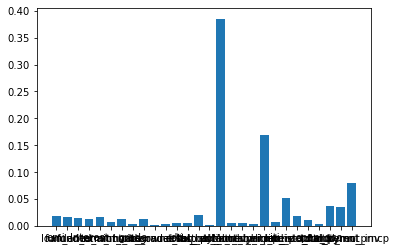

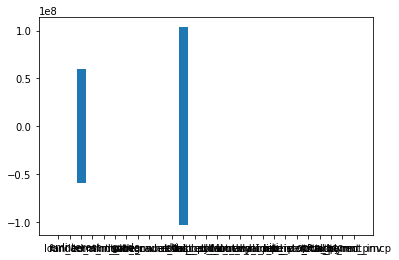

In [7]:
#TRAINING MODEL
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(train[features], y)
importances=clf.feature_importances_
plt.bar(features,importances)
plt.show()
features = ["emi","loan_amnt","Interest","funded_amnt_inv","term_month","int_rate","grade","sub_grade",
            "home_ownership","annual_inc","dti","revol_bal","total_rec_int","tot_coll_amt","last_pymnt_amnt","tot_cur_bal",
            "total_rev_hi_lim","Monthly_income","Interest","unpaid_perc","iti","paid_perc","rec_isto_fund","rec_isto_fundterm",
           "open_acc","revol_bal","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","tot_coll_amt"]
reg=linear_model.LinearRegression()
reg.fit(train[features],train['funded_amnt'])
importance = reg.coef_
plt.bar(features,importance)
plt.show()

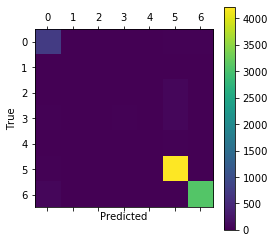

In [8]:
from sklearn.metrics import confusion_matrix
features=["rec_isto_fund","iti","emi","last_pymnt_amnt","Interest","tot_coll_amt","unpaid_perc"]
clf.fit(train[features], y)
preds = clf.predict(test[features])
c=confusion_matrix(test['loan_status'],preds)
plt.matshow(c)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
#ACCURACY
print(pd.crosstab(test['loan_status'], preds, rownames=['actual loan'], colnames=['predicted loan']))
#clf.predict_proba(test[features])
x=(accuracy_score(test['loan_status'],preds,normalize=False))/len(preds)
print(x*100)

predicted loan    0  1  2   3  4     5     6
actual loan                                 
0               739  0  0  12  0    29    19
1                 8  0  0   1  0     0     0
2                 0  0  0   0  0    69     1
3                22  0  1  17  0    78     2
4                 1  0  0   1  0    19     0
5                22  1  3   8  1  4222    12
6                82  0  0   1  0     8  3097
95.26899480887211


In [10]:
#FUND PREDCITON
features=["rec_isto_fund","iti","emi","last_pymnt_amnt","Interest","tot_coll_amt","unpaid_perc"]
reg.fit(train[features],train['funded_amnt'])
res=reg.predict(test[features])
test["pred_amnt"]=res
frame=test[["member_id","funded_amnt","pred_amnt"]]
frame.head(25)

,member_id,funded_amnt,pred_amnt
28,11018380,24000,20476.943550
30,11416904,20000,20389.888803
58,11446960,24000,22596.140718
63,11021504,10000,10485.372320
65,8460678,12000,12783.975327
69,8449591,5000,6265.075548
100,11196766,17625,17958.584128
112,10777431,25000,24422.789905
120,11486754,24000,21595.223702
122,11416780,20000,20798.011551


In [11]:
new_t=test
new_t["pred_status"]=preds
#new_t["pred_amnt"]=new_t["pred_status"]*new_t["pred_amnt"]
frame=new_t[["member_id","loan_status","pred_status","funded_amnt","pred_amnt"]]
frame.head(17)

,member_id,loan_status,pred_status,funded_amnt,pred_amnt
28,11018380,6,6,24000,20476.943550
30,11416904,5,5,20000,20389.888803
58,11446960,6,6,24000,22596.140718
63,11021504,5,5,10000,10485.372320
65,8460678,0,0,12000,12783.975327
69,8449591,5,5,5000,6265.075548
100,11196766,5,5,17625,17958.584128
112,10777431,0,0,25000,24422.789905
120,11486754,5,5,24000,21595.223702
122,11416780,6,6,20000,20798.011551


In [13]:
features=["rec_isto_fund","iti","emi","last_pymnt_amnt","Interest","tot_coll_amt","unpaid_perc"]
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(train[features], y)
preds1 = logisticRegr.predict(test[features])
lac=(accuracy_score(test['loan_status'],preds1,normalize=False))/len(preds)
print(lac*100)

85.32484688363155


In [14]:
from sklearn.svm import SVC
regressor = SVC()
regressor.fit(train[features], y)
preds2=regressor.predict(test[features])
svac=(accuracy_score(test['loan_status'],preds2,normalize=False))/len(preds)
print(svac*100)

85.24078299507626


In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(train[features], y)
preds3=model.predict(test[features])
kac=(accuracy_score(test['loan_status'],preds3,normalize=False))/len(preds)
print(kac*100)

76.73832112405428


In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train[features], y)
preds6=gnb.predict(test[features])
gnbac=(accuracy_score(test['loan_status'],preds6,normalize=False))/len(preds)
print(gnbac*100)

82.7548937192266


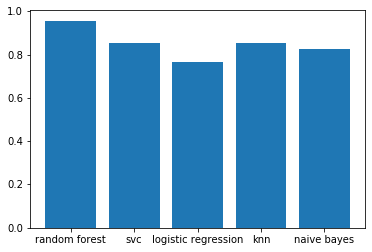

In [17]:
alg=pd.DataFrame()
alg["algorithms"]=['random forest','svc','logistic regression','knn','naive bayes']
alg["accuracy"]=[x,lac,kac,svac,gnbac]
plt.bar(alg["algorithms"],alg["accuracy"])
plt.show()

In [12]:
import tkinter as gui
import tkinter.messagebox as msg
root = gui.Tk()
root.title("Predicting credit defaulters")
root.iconbitmap("E:/ABHI/banktest/icon.ico")
root.geometry("480x240")

def remove():
    int_entry.delete(0,"end")
    term_entry.delete(0,"end")
    loan_entry.delete(0,"end")
    bal_entry.delete(0,"end")
    income_entry.delete(0,"end")
    pay_entry.delete(0,"end")
    dis_label.grid_forget()
    diss_label.grid_forget()
    func()

def func():
    try:
        login_lable.grid_forget()
        login_entry.grid_forget()
        password_lable.grid_forget()
        password_entry.grid_forget()
        proced_button.grid_forget()
        int_label = gui.Label(root, text="interest rate ")
        pay_label = gui.Label(root, text="last payment")
        income_label = gui.Label(root, text="Annual income")
        term_label = gui.Label(root, text="term in months")
        loan_label = gui.Label(root, text="loan amount")
        bal_label = gui.Label(root, text="current balance")

        global dis_label, diss_label

        reset_button = gui.Button(root, text="reset", command=remove)
        proceed_button = gui.Button(root, text="proceed", command=fun)

        global int_entry, term_entry, loan_entry, bal_entry
        global income_entry, pay_entry

        int_entry = gui.Entry(root, width=60)
        pay_entry = gui.Entry(root, width=60)
        income_entry = gui.Entry(root, width=60)
        term_entry = gui.Entry(root, width=60)
        loan_entry = gui.Entry(root, width=60)
        bal_entry = gui.Entry(root, width=60)
        dis_label=gui.Label(root,text="                                                                                                          ")
        diss_label=gui.Label(root,text="                                                                                                         ")

        income_label.grid(row=0, column=2)
        income_entry.grid(row=0, column=3)
        pay_label.grid(row=1, column=2)
        pay_entry.grid(row=1, column=3)
        int_label.grid(row=2, column=2)
        int_entry.grid(row=2, column=3)
        term_label.grid(row=3, column=2)
        term_entry.grid(row=3, column=3)
        loan_label.grid(row=4, column=2)
        loan_entry.grid(row=4, column=3)
        bal_label.grid(row=5, column=2)
        bal_entry.grid(row=5, column=3)
        dis_label.grid(row=7,column=1,columnspan=3)
        diss_label.grid(row=8,column=1,columnspan=3)
        proceed_button.grid(row=6, column=1, columnspan=3)
        reset_button.grid(row=6, column=3, columnspan=3)

    except Exception as e:
        msg.showerror(title="error",message="incorrect credentials")

def fun():
    try:
        inter = float(int_entry.get())
        pay = float(pay_entry.get())
        income = float(income_entry.get())
        term = float(term_entry.get())
        loan = float(loan_entry.get())
        bal = float(bal_entry.get())
        # a=[income,term,loan,inter,pay]
        interest = loan * term * inter / 1200
        unpaid_percent = interest - (pay / loan)
        emii = (loan + interest) / term
        itii = interest / income
        rec_tofu = pay / loan
        col = bal + pay
        # 40%
        salary = float(income / 12)
        a = 0
        b = 0
        c = 0
        d = 0
        if (0.2 * salary) >= emii:
            a = 10
        else:
            a = round((((0.2 * salary) / emii) * 10))
        if pay >= emii:
            b = 10
        else:
            b = round((((pay) / emii) * 10))
        if (loan / term) < (0.1 * salary):
            c = 10
        else:
            c = round((((0.1 * salary) / (loan / term)) * 10))
        if bal <= ((0.4) * loan):
            d = 10
        else:
            d = round((((0.4 * loan)/bal) * 10))

        total = a + b + c + d
        out = clf.predict([[rec_tofu, itii, emii, pay, interest, col, unpaid_percent]])
        ans = reg.predict([[rec_tofu, itii, emii, pay, interest, col, unpaid_percent]])
        out = out * 10
        out = out + total
        risk=100-out
        if out < 75:
            f = 0
            dis_label = gui.Label(root, text="sorry loan cannot be sanctioned as there is "+str(risk)+"%"+" risk")
        else:
            dis_label = gui.Label(root, text="               loan accepted and is "+str(out)+"% safe                      ")
            f = 1
        ans = abs(ans)
        dis_label.grid(row=7, column=0, columnspan=5)
        if f == 0:
            diss_label = gui.Label(root, text="                      defaulter                                               ")
        else:
            if ans > loan:
                ans = loan
            diss_label = gui.Label(root, text="loan of amount of" + " " + str(ans) + " " + "can be sanctioned")
        diss_label.grid(row=8, column=0, columnspan=5)
    except Exception as e:
        msg.showerror(title="error", message="incorrect credentials")

def check():
    strg = ""
    x = {"sashank": "123", "vishal": "456"}
    usr = login_entry.get()
    pwd = password_entry.get()
    for i in x:
        if i == usr:
            if pwd == x[i]:
                strg = "                                  "
                dis = gui.Label(root, text=strg)
                dis.grid(row=5, column=1, columnspan=3)
                func()
                return
            else:
                strg = "   pwd incorrect     "
                break
        else:
            strg = "incorrect username"
    dis = gui.Label(root, text=strg)
    dis.grid(row=5, column=1, columnspan=3)


login_lable = gui.Label(root, text="user name")
password_lable = gui.Label(root, text="password")

login_entry = gui.Entry(root, width=60)
password_entry = gui.Entry(root, width=60,show="*")
proced_button = gui.Button(root, text="login", command=check)

login_lable.grid(row=2, column=1)
login_entry.grid(row=2, column=2)
password_lable.grid(row=3, column=1)
password_entry.grid(row=3, column=2)
proced_button.grid(row=4, column=1, columnspan=2)

root.mainloop()